# Морозко Иван. Группа 23.М07

  - [✔️] Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат.
  - [✔️] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
  - [✔️] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
  - [✔️] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).

  Выполнено в первом задании: [ссылка](https://github.com/ol-imorozko/MachineLearning/blob/master/Task_1_Exploratory_Analysis.ipynb)
  
  - [✔️] Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал **методом градиентного спуска (Batch Gradient Descent, GD)** и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.
  - [✔️] Случайным образом разбить данные на **обучающую** и **тестовую** выборки, используя методы существующих библиотек.
  - [✔️] При обучении моделей использовать **масштабирование данных**.
  - [✔️] Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.
  - [✔️] Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с Вашей реализацией.
  - [✔️] Повторить тоже самое, но используя **кросс-валидацию**.
  - [✔️] Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, **E** --- мат. ожидание и **STD** --- стандартное отклонение. Сделать выводы.
  - [✔️] * (+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя **Recursive Feature Elimination (RFE)** из **sklearn**.
  - [✔️] * (+1 балл) Во все ваши реализации добавить возможность настройки нужных **гиперпараметров**, а в процессе обучения **всех** моделей осуществить подбор оптимальных значений этих гиперпараметров.
  - [✔️] * (+1 балл) Также самостоятельно реализовать **метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD)**, обучить модели и добавить их во все сравнения.
  - [✔️] * (+1 балл) Также самостоятельно реализовать **метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent)**, обучить модели и добавить их во все сравнения.
  
  Выполнено в текущем задании

# Датасет

Используется датасет из предыщуей задачи, показывающий пищевую ценность продуктов.

Целевым признаком является содержание белка

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%precision %.4f

df = pd.read_csv("drive/MyDrive/Colab Notebooks/cleaned_data.csv")

df

,Shrt_Desc,Protein,Protein Category,Energ_Kcal,Carbohydrt,Water,Fatty_Acids,Cholestrl,Ash,Phosphorus,Zinc,Fiber_TD,Sugar_Tot,Vit_B
0,Other,850.0,Low,717,60.0,15870.0,75432.0,215.0,2110.0,24.0,0.09,0.0,60.0,19.00017
1,Other,490.0,Low,718,2870.0,16720.0,68595.0,225.0,1620.0,24.0,0.05,0.0,60.0,19.00607
2,Other,280.0,Low,876,0.0,240.0,94350.0,256.0,0.0,3.0,0.01,0.0,0.0,22.32001
3,Other,21400.0,High,353,2340.0,42410.0,27247.0,75.0,5110.0,387.0,2.66,0.0,500.0,18.79522
4,Other,23240.0,High,371,2790.0,41110.0,28146.0,94.0,3180.0,451.0,2.60,0.0,510.0,16.27726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,Other,18500.0,Medium,305,0.0,43000.0,21678.0,95.0,13400.0,254.0,1.10,0.0,0.0,105.56200
8786,Other,20540.0,High,111,5410.0,70250.0,522.0,41.0,2970.0,426.0,1.55,0.0,0.0,112.33215
8787,Other,0.0,Low,269,73140.0,26000.0,0.0,0.0,860.0,8.0,0.19,0.0,73200.0,0.29000
8788,Other,16100.0,Medium,90,2000.0,79200.0,872.0,50.0,1300.0,272.0,1.00,0.0,0.0,66.67250


Выкинем строковые признаки:

In [65]:
df.drop(columns=['Shrt_Desc', 'Protein Category'], inplace=True)
df

,Protein,Energ_Kcal,Carbohydrt,Water,Fatty_Acids,Cholestrl,Ash,Phosphorus,Zinc,Fiber_TD,Sugar_Tot,Vit_B
0,850.0,717,60.0,15870.0,75432.0,215.0,2110.0,24.0,0.09,0.0,60.0,19.00017
1,490.0,718,2870.0,16720.0,68595.0,225.0,1620.0,24.0,0.05,0.0,60.0,19.00607
2,280.0,876,0.0,240.0,94350.0,256.0,0.0,3.0,0.01,0.0,0.0,22.32001
3,21400.0,353,2340.0,42410.0,27247.0,75.0,5110.0,387.0,2.66,0.0,500.0,18.79522
4,23240.0,371,2790.0,41110.0,28146.0,94.0,3180.0,451.0,2.60,0.0,510.0,16.27726
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,18500.0,305,0.0,43000.0,21678.0,95.0,13400.0,254.0,1.10,0.0,0.0,105.56200
8786,20540.0,111,5410.0,70250.0,522.0,41.0,2970.0,426.0,1.55,0.0,0.0,112.33215
8787,0.0,269,73140.0,26000.0,0.0,0.0,860.0,8.0,0.19,0.0,73200.0,0.29000
8788,16100.0,90,2000.0,79200.0,872.0,50.0,1300.0,272.0,1.00,0.0,0.0,66.67250


# Имплементация линейной регрессии

## Добавление фиктивного признака


In [66]:
def add_ones_vector(samples):
    samples_matrix = samples.copy()
    if samples.ndim == 1:
        samples_matrix = samples_matrix.reshape(-1, 1)

    ones_vec = np.ones((samples_matrix.shape[0], 1))
    return np.hstack([ones_vec, samples_matrix])

## Класс линейной регрессии

In [67]:
class UniversalLinearRegression:
    def __init__(self, method='GD', epsilon=1E-4, alpha=1, step_coef=1E-2, batch_size=10, max_iterations=10_000):
        self.w = None
        self.epsilon = epsilon
        self.alpha = alpha
        self.step_coef = step_coef
        self.max_iter = max_iterations
        self.batch_size = batch_size
        self.method = method  # This can be 'GD', 'SGD', or 'MiniBatchGD'

    def fit(self, X, y):
        samples_num = np.shape(X)[0]
        features_num = np.shape(X)[1]
        X_sample = add_ones_vector(X)
        w = np.random.randn(features_num + 1, )

        if self.method == 'GD':
            w = self.gradient_descent(X_sample, y, w)
        elif self.method == 'SGD':
            w = self.stochastic_gradient_descent(X_sample, y, w)
        elif self.method == 'MiniBatchGD':
            w = self.mini_batch_gradient_descent(X_sample, y, w)
        else:
            raise ValueError("Invalid method. Choose 'GD', 'SGD', or 'MiniBatchGD'.")

        self.w = w

    def predict(self, x):
        return np.matmul(add_ones_vector(x), self.w)

### Градиентный спуск

In [68]:
def gradient_descent(self, X, y, w):
    samples_num = np.shape(X)[0]

    for _ in range(self.max_iter):
        y_estimated = X.dot(w)
        error = y_estimated - y

        # Gradient calculation with decreasing step
        gradient = (1 / samples_num) * (X.T.dot(error) + self.alpha * w)
        diff = self.step_coef * gradient

        w -= diff

        if np.all(np.abs(diff) <= self.epsilon):
            break

    return w

UniversalLinearRegression.gradient_descent = gradient_descent

### Стохаистический градиентный спуск

In [69]:
def stochastic_gradient_descent(self, X, y, w):
    samples_num = np.shape(X)[0]
    features_num = np.shape(X)[1] # including dummy feature

    for _ in range(self.max_iter):
        rnd_i = np.random.randint(samples_num)
        x_i = X[rnd_i].reshape(1, features_num)
        y_i = y[rnd_i]

        y_estimated = x_i.dot(w)
        error = y_estimated - y_i

        grad = x_i.T.dot(error) + self.alpha * w
        diff = self.step_coef * grad

        w -= diff

        if np.all(np.abs(diff) <= self.epsilon):
            break

    return w

UniversalLinearRegression.stochastic_gradient_descent = stochastic_gradient_descent

### Мини-пакетный градиентный спуск

In [78]:
def mini_batch_gradient_descent(self, X, y, w):
    samples_num = np.shape(X)[0]
    features_num = np.shape(X)[1] # including dummy feature

    for _ in range(self.max_iter):
       all_indices = np.arange(samples_num)
       np.random.shuffle(all_indices)

       num_batch = samples_num // self.batch_size
       batch_indices = np.array_split(all_indices, num_batch)

       for indices in batch_indices:
           x_batch = X[indices]
           y_batch = y[indices]

           y_estimated = x_batch.dot(w)
           error = y_estimated - y_batch

           grad = (1 / len(x_batch)) * (x_batch.T.dot(error) + self.alpha * w)
           diff = self.step_coef * grad

           w -= diff

           if np.all(np.abs(diff) <= self.epsilon):
               break

    return w

UniversalLinearRegression.mini_batch_gradient_descent = mini_batch_gradient_descent

# Определение X и Y

In [72]:
x = df.drop(columns=['Protein'])
y = df['Protein']

# Масштабирование признаков

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Energ_Kcal,Carbohydrt,Water,Fatty_Acids,Cholestrl,Ash,Phosphorus,Zinc,Fiber_TD,Sugar_Tot,Vit_B
0,2.888612,-0.809252,-1.242867,4.515422,1.490059,0.110750,-0.713432,-0.615106,-0.516859,-0.579956,-0.182269
1,2.894499,-0.706206,-1.215242,4.043993,1.575505,-0.055444,-0.713432,-0.627241,-0.516859,-0.579956,-0.182157
2,3.824633,-0.811452,-1.750840,5.819867,1.840387,-0.604901,-0.819581,-0.639377,-0.516859,-0.584231,-0.119383
3,0.745770,-0.725641,-0.380321,1.192941,0.293820,1.128263,1.121427,0.164608,-0.516859,-0.548603,-0.186151
4,0.851735,-0.709139,-0.422570,1.254930,0.456167,0.473663,1.444928,0.146405,-0.516859,-0.547890,-0.233847


# Выбор наилучшего подмножества признаков


In [74]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

rfecv = RFECV(estimator=LinearRegression())
rfecv.fit(x, y)

best_cols = list(x.columns[rfecv.support_])
print("Sufficient features:", rfecv.n_features_)
print("Most important features:", *best_cols)

Sufficient features: 10
Most important features: Energ_Kcal Carbohydrt Water Fatty_Acids Cholestrl Ash Phosphorus Zinc Fiber_TD Vit_B


Отказываемся только от признака `Sugar_Tot`

# Разбиение на тренировочную и тестовую выборку

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Подбор гиперпараметров

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_grid = np.logspace(-4, 4, 100)
epsilon_grid = np.logspace(-4, 4, 10)

searcher = GridSearchCV(
    Ridge(),
    [{"alpha": alpha_grid, "tol": epsilon_grid}],
    scoring="neg_mean_squared_error",
    cv=5,
)
searcher.fit(x_train, y_train)

opt_alpha = searcher.best_params_["alpha"]
opt_epsilon = searcher.best_params_["tol"]

print(f"alpha = {opt_alpha}")
print(f"epsilon (точность решения) = {opt_epsilon}")

alpha = 0.298364724028334
epsilon (точность решения) = 0.0001


# Обучение моделей

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

def to_np(a):
    res = []
    for elem in a:
        res.append(elem.to_numpy())
    return res

np_x_train, np_x_test, np_y_train, np_y_test = to_np([x_train, x_test, y_train, y_test])

def print_results(y_train, y_train_pred, y_test, y_test_pred):
    print("Test RMSE =", mean_squared_error(y_test, y_test_pred, squared=False))
    print("Train RMSE =", mean_squared_error(y_train, y_train_pred, squared=False))
    print("Test MSE =", mean_squared_error(y_test, y_test_pred, squared=True))
    print("Train MSE =", mean_squared_error(y_train, y_train_pred, squared=True))
    print("Test R^2 =", r2_score(y_test, y_test_pred))
    print("Train R^2 =", r2_score(y_train, y_train_pred))

# Initialize models with different methods using UniversalLinearRegression class
models = {
    "Gradient descent": UniversalLinearRegression(method='GD', alpha=opt_alpha, epsilon=opt_epsilon),
    "Stochaistic gradient descent": UniversalLinearRegression(method='SGD', alpha=opt_alpha, epsilon=opt_epsilon),
    "Mini Batch GD": UniversalLinearRegression(method='MiniBatchGD', alpha=opt_alpha, epsilon=opt_epsilon, batch_size=np_x_train.shape[0] // 8),
    "Ridge": Ridge(alpha=opt_alpha, tol=opt_epsilon)
}

predicts = {}
for name, model in models.items():
    print(f"Training Model: {name}")
    model.fit(np_x_train, np_y_train)

    # Predict using the model
    y_train_pred = model.predict(np_x_train)
    y_test_pred = model.predict(np_x_test)

    # Store predictions if needed
    predicts[name] = (y_train_pred, y_test_pred)

    # Print results
    print(f"Results for {name}:")
    print_results(np_y_train, y_train_pred, np_y_test, y_test_pred)
    print("-----------------------------")

Training Model: Gradient descent
Results for Gradient descent:
Test RMSE = 3241.4515953714294
Train RMSE = 3224.7571767129166
Test MSE = 10507008.445135985
Train MSE = 10399058.84876146
Test R^2 = 0.9056257415809577
Train R^2 = 0.9060770590815748
-----------------------------
Training Model: Stochaistic gradient descent
Results for Stochaistic gradient descent:
Test RMSE = 7012.094933587844
Train RMSE = 7841.2697928881435
Test MSE = 49169475.35764831
Train MSE = 61485511.96486007
Test R^2 = 0.5583583283518168
Train R^2 = 0.44467088881774375
-----------------------------
Training Model: Mini Batch GD
Results for Mini Batch GD:
Test RMSE = 2747.964081327916
Train RMSE = 2611.5715847535375
Test MSE = 7551306.592268378
Train MSE = 6820306.142292104
Test R^2 = 0.9321739424250619
Train R^2 = 0.9383998859738766
-----------------------------
Training Model: Ridge
Results for Ridge:
Test RMSE = 2742.4840121953766
Train RMSE = 2601.8716518598026
Test MSE = 7521218.55714725
Train MSE = 6769736.09

## График предсказания

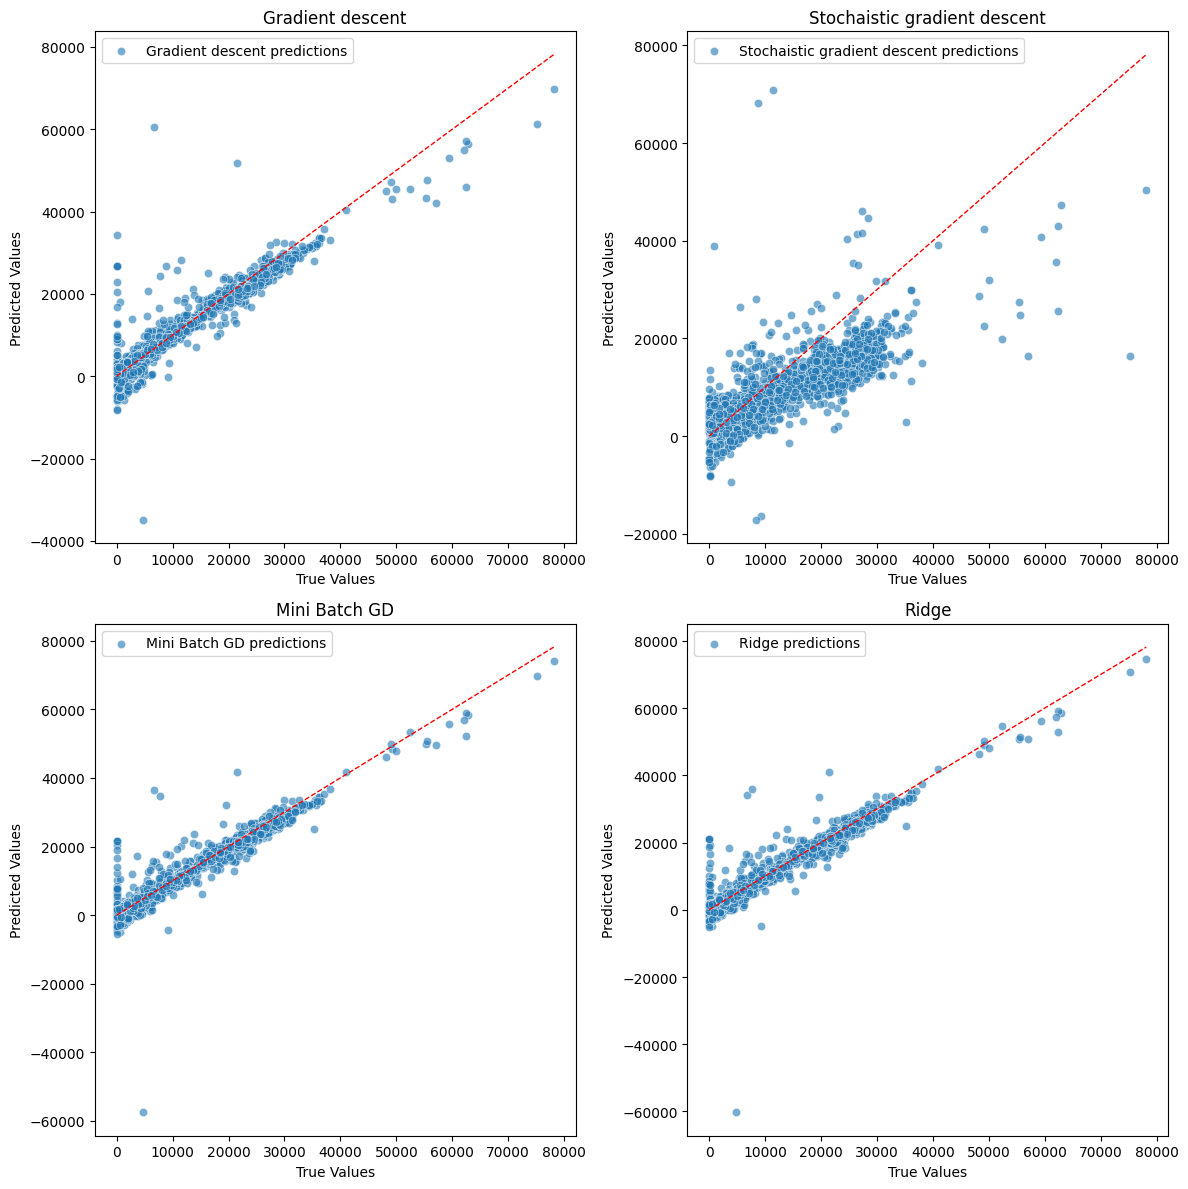

In [92]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax = ax.ravel()

for i, (model_name, predictions) in enumerate(predicts.items()):
    _, y_test_pred = predictions

    sns.scatterplot(x=y_test, y=y_test_pred, ax=ax[i], label=f"{model_name} predictions", alpha=0.6)

    ax[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)

    ax[i].set_title(model_name)
    ax[i].set_xlabel("True Values")
    ax[i].set_ylabel("Predicted Values")

    ax[i].legend()

plt.tight_layout()
plt.show()

## Кросс-валидация

In [ ]:
from sklearn.model_selection import KFold

fold = KFold(n_splits=5)

template_df = pd.DataFrame(index=['mse-train', 'mse-test', 'rmse-train', 'rmse-test', 'r2-train', 'r2-test'])

results = {key: template_df.copy() for key in ["Gradient descent", "Stochaistic gradient descent", "Mini Batch GD", "Ridge"]}

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred, squared=True)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return [mse, rmse, r2]

for name, model in models.items():
    for fold_i, (train_i, test_i) in enumerate(fold.split(X=np_x_train, y=np_y_train)):
        cur_x_train, cur_x_test = np_x_train[train_i], np_x_train[test_i]
        cur_y_train, cur_y_test = np_y_train[train_i], np_y_train[test_i]

        model.fit(cur_x_train, cur_y_train)
        y_train_pred, y_test_pred = model.predict(cur_x_train), model.predict(cur_x_test)

        train_metrics = calculate_metrics(cur_y_train, y_train_pred)
        test_metrics = calculate_metrics(cur_y_test, y_test_pred)

        results[name].insert(loc=fold_i, column=f"Fold{fold_i + 1}", value=train_metrics + test_metrics)

    results[name]["Avg"] = results[name].mean(axis=1)
    results[name]["Std"] = results[name].std(axis=1)

pd.options.display.float_format = '{:.3f}'.format

## Результаты

### Градиентный спуск

In [88]:
results["Gradient descent"]

,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
mse-train,10114409.067,10102439.815,10970130.640,10604435.462,9978387.614,10353960.520,375261.478
mse-test,3180.316,3178.434,3312.119,3256.445,3158.859,3217.234,57.994
rmse-train,0.907,0.906,0.900,0.906,0.912,0.906,0.004
rmse-test,9779665.677,12838306.607,7813750.222,8995830.992,16005090.746,11086528.849,2968196.936
r2-train,3127.246,3583.058,2795.309,2999.305,4000.636,3301.111,434.967
r2-test,0.916,0.895,0.933,0.911,0.836,0.898,0.033


### Стохастический градиентный спуск

In [89]:
results["Stochaistic gradient descent"]

,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
mse-train,255086982.693,92101486.150,71523205.972,84548887.286,54073354.231,111466783.267,72960050.169
mse-test,15971.443,9596.952,8457.139,9195.047,7353.459,10114.808,3026.127
rmse-train,-1.335,0.145,0.346,0.253,0.526,-0.013,0.673
rmse-test,510776690.333,82875951.687,61015873.701,51113694.842,94207489.176,159997939.948,176054051.063
r2-train,22600.369,9103.623,7811.266,7149.384,9706.054,11274.139,5735.131
r2-test,-3.388,0.323,0.473,0.493,0.032,-0.413,1.497


### Мини-пакетный градиентный спуск

In [90]:
results["Mini Batch GD"]

,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
mse-train,5840082.773,6925020.402,7016248.950,7138140.393,6966530.547,6777204.613,473984.808
mse-test,2416.626,2631.543,2648.820,2671.730,2639.419,2601.628,93.477
rmse-train,0.947,0.936,0.936,0.937,0.939,0.939,0.004
rmse-test,10769321.915,7071427.596,6054595.054,5737237.006,7603804.344,7447277.183,1792514.758
r2-train,3281.665,2659.216,2460.609,2395.253,2757.500,2710.848,313.973
r2-test,0.907,0.942,0.948,0.943,0.922,0.932,0.015


### Библиотечный "Ridge"

In [91]:
results["Ridge"]

,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
mse-train,5756655.545,6860547.283,6931865.972,7070897.814,6898774.480,6703748.219,478840.737
mse-test,2399.303,2619.265,2632.844,2659.116,2626.552,2587.416,95.013
rmse-train,0.947,0.936,0.937,0.938,0.939,0.939,0.004
rmse-test,11394114.183,6660263.241,6323479.521,5669877.997,6851889.302,7379924.849,2046987.413
r2-train,3375.517,2580.749,2514.653,2381.151,2617.611,2693.936,350.190
r2-test,0.902,0.946,0.945,0.944,0.930,0.933,0.017


# Выводы

Реализованный обычный градиентный спуск и мини-пакетный градиентный спуск показывает себя так же как библиотечный Ridge.

Кросс-валидация, судя по низким значениям `rt-test` и отличному `Avg`, показывает что ошибка мало зависит от выбора конкретных данных для обучения